In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE, RFECV, SelectFromModel, SequentialFeatureSelector
from sklearn.model_selection import train_test_split

In [8]:
X, y, feature_names, _, _ = load_boston().values()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X, columns = feature_names), pd.Series(y, name='label'), test_size = .2, random_state=42)

In [73]:
model = RandomForestRegressor(random_state=42)

rfe = RFECV(estimator=model, cv=5, scoring='r2')
sfm = SelectFromModel(estimator=model, threshold='median')
sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=7, scoring='r2')

In [47]:
sfs.fit(X_train, y_train)
sfs.support_

array([ True, False, False, False,  True,  True, False,  True, False,
        True,  True, False,  True])

In [49]:
sfm.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                threshold='median')

In [50]:
sfm.get_support()

array([ True, False, False, False,  True,  True, False,  True, False,
        True,  True, False,  True])

In [51]:
sfm.threshold_

0.015543774442661407

In [74]:
rfe = RFE(estimator=model, )

In [75]:
rfe.fit(X_train, y_train)

rfe.ranking_

array([1, 7, 5, 8, 2, 1, 3, 1, 6, 1, 1, 4, 1])

In [89]:
result = np.zeros(feature_names.size)
rk = np.array([ 3,  1,  8,  2, 11,  6,  4,  9, 10,  0,  7, 12,  5])
ch = int(feature_names.size/2)
result[rk[-ch:]] = 1

In [90]:
result

array([1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.])

In [97]:
np.arange(feature_names.size - ch, 1, -1)

array([7, 6, 5, 4, 3, 2])

In [98]:
result[rk[:-ch]] = np.arange(feature_names.size - ch +1, 1, -1)

In [99]:
result

array([1., 7., 5., 8., 2., 1., 3., 1., 6., 1., 1., 4., 1.])

In [ ]:
array([ 3,  1,  8,  2, 11,  6,  4,  9, 10,  0,  7, 12,  5], dtype=int64)

In [70]:
rfe.get_support()

array([ True, False, False, False, False,  True, False,  True, False,
        True,  True, False,  True])

In [56]:
rfe.ranking_

array([1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
rfe.grid_scores_

array([0.40255734, 0.72608674, 0.77187572, 0.80207154, 0.81086884,
       0.80908195, 0.81866078, 0.82520886, 0.82870915, 0.82773112,
       0.83111899, 0.82651738, 0.82609746])

In [62]:
rfe.n_features_in_

13

In [77]:
model.fit(X_train, y_train)
model.feature_importances_

array([0.03806177, 0.00175615, 0.00795268, 0.00100426, 0.01554377,
       0.50384493, 0.01383994, 0.06054907, 0.00381091, 0.01566064,
       0.01631341, 0.01215362, 0.30950883])

In [78]:
np.argsort(model.feature_importances_)

array([ 3,  1,  8,  2, 11,  6,  4,  9, 10,  0,  7, 12,  5], dtype=int64)

In [79]:
np.argsort([3,1,2])

array([1, 2, 0], dtype=int64)

In [72]:
np.ones((4,2))[1, :] = 0

In [85]:
elim = np.ones(X_train.shape)
elim[:, [3,1]] = 0

In [86]:
model.fit(X_train*elim, y_train)
model.feature_importances_

array([0.03771399, 0.        , 0.00747284, 0.        , 0.01596364,
       0.50335278, 0.01387005, 0.06124826, 0.00439469, 0.01773102,
       0.01553714, 0.01240165, 0.31031397])

In [87]:
np.argsort(model.feature_importances_, )

array([ 1,  3,  8,  2, 11,  6, 10,  4,  9,  0,  7, 12,  5], dtype=int64)

In [84]:
np.argsort(model.feature_importances_, )

array([ 3,  1,  8,  2, 11,  6,  4,  9, 10,  0,  7, 12,  5], dtype=int64)

In [71]:
np.argsort(model.feature_importances_, )

array([ 3,  1,  8,  2, 11,  6,  4,  9, 10,  0,  7, 12,  5], dtype=int64)

<BarContainer object of 13 artists>

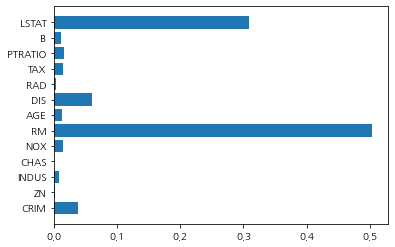

In [29]:
plt.barh(feature_names, model.feature_importances_)

In [32]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Optimal number of features : 3


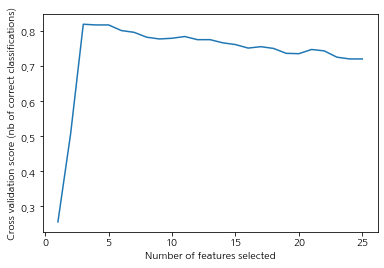

In [58]:
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [65]:
rfecv.n_features_

3